In [1]:
# !pip install tabulate
# !pip install sentence_transformers

In [2]:
import numpy as np
from sentence_transformers import SentenceTransformer
from tabulate import tabulate

ModuleNotFoundError: No module named 'numpy'

In [3]:
import fasttext

# You need to download the model file first — e.g. `cc.en.300.bin.gz`
# Download from fastText website: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

# Then load it:
model = fasttext.load_model('cc.en.300.bin')

# Example usage:
vec = model.get_word_vector('cat')
print(len(vec))  # should be 300


300


In [4]:
# Here we can make lists for datasets we want to order
# All these lists are generated by chat gpt
animals = [
    "kitten", "puppy", "rabbit", "panda", "hedgehog",
    "hamster", "dolphin", "horse", "penguin",
    "fox", "deer", "owl", "cow", "chicken", "goat",
    "pig", "parrot", "squirrel", "rat", "snake", "spider",
    "bat", "vulture", "shark", "cockroach", "maggot", "worm", "hyena"
]
prettiness = [
    "repulsive",
    "grotesque",
    "hideous",
    "unsightly",
    "unattractive",
    "drab",
    "plain",
    "ordinary",
    "unremarkable",
    "pretty",
    "lovely",
    "charming",
    "beautiful",
    "gorgeous",
    "stunning",
    "breathtaking",
    "divine",
    "sublime",
    "heavenly",
    "transcendent",
    "neutral",
    "normal"
]

animals_size = [
    # Tiny / Small
    "bumblebee",
    "ant",
    "mouse",
    "hummingbird",
    "frog",
    "rabbit",
    "squirrel",

    # Medium
    "cat",
    "dog",
    "fox",
    "sheep",
    "goat",
    "pig",

    # Large
    "wolf",
    "deer",
    "kangaroo",
    "leopard",
    "horse",

    # Very Large
    "cow",
    "camel",
    "giraffe",
    "moose",
    "elephant",
    "hippopotamus",
    "rhinoceros",

    # Giant
    "whale shark",
    "blue whale",
    "elephant seal",
    "saltwater crocodile",
    "whale"
]

intelligence_items = [
    # High intelligence
    "dolphin",
    "chimpanzee",
    "elephant",
    "crow",
    "parrot",
    "octopus",
    "human",
    "computer",
    "chess",
    "puzzle",

    # Medium intelligence
    "dog",
    "cat",
    "horse",
    "rabbit",
    "goat",
    "checkers",
    "card game",
    "robot",

    # Low intelligence
    "sheep",
    "chicken",
    "goldfish",
    "toy",
    "ball",
    "marbles",
    "dice",
    "teddy bear"
]



In [5]:
# Pretty category
beautiful_words = [
    "pretty",
    "lovely",
    "charming",
    "gorgeous",
    "stunning",
    "breathtaking",
    "sublime"
]

ugly_words = [
    "unattractive",
    "plain",
    "unsightly",
    "hideous",
    "repulsive",
    "grotesque",
    "abominable"
]

# Cute category
cute_words = [
    "adorable",
    "sweet",
    "charming",
    "endearing",
    "lovely",
    "delightful",
    "precious",
    "darling",
    "cuddly",
    "cherubic"
]

horrific_words = [
    "unpleasant",
    "ugly",
    "unsightly",
    "repulsive",
    "hideous",
    "grotesque",
    "monstrous",
    "abhorrent",
    "abominable",
    "horrifying"
]

# Size category
big_words = [
    "huge",
    "massive",
    "enormous",
    "gigantic",
    "colossal",
    "bulky",
    "immense",
    "titanic",
    "mammoth",
    "gargantuan"
]

small_words = [
    "tiny",
    "minuscule",
    "microscopic",
    "petite",
    "diminutive",
    "compact",
    "wee",
    "lilliputian",
    "teeny",
    "pint-sized"
]

# Intelligence category
smart_words = [
    "smart",
    "intelligent",
    "clever",
    "brilliant",
    "wise",
    "bright",
    "genius",
    "sharp",
    "insightful",
    "astute"
]

dumb_words = [
    "stupid",
    "dumb",
    "foolish",
    "ignorant",
    "dense",
    "brainless",
    "dim",
    "slow",
    "simple-minded",
    "unintelligent"
]

positive_words = [
    "joyful", "optimistic", "brilliant", "confident", "gracious", "honest",
    "inspiring", "creative", "reliable", "courageous", "supportive",
    "enthusiastic", "kindhearted", "resilient", "vibrant", "compassionate",
    "hopeful", "generous", "capable", "motivated", "successful",
    "uplifting", "thoughtful", "adaptable", "respectful", "friendly",
    "determined", "warm", "empathetic", "patient", "positive", "good"
]

negative_words = [
    "angry", "hostile", "dishonest", "rude", "anxious", "fearful",
    "irritated", "resentful", "bitter", "jealous", "lazy",
    "unreliable", "aggressive", "pessimistic", "stubborn",
    "careless", "arrogant", "selfish", "judgmental", "moody",
    "apathetic", "chaotic", "insecure", "frustrated", "gloomy",
    "impatient", "neglectful", "manipulative", "deceitful",
    "disrespectful", "negative", "bad"
]

In [6]:
# This function does the projection, changed from the previous one to one I understand intuitively
def proj_meas(v1, v2, v3):
    dl = np.linalg.norm(v1 - v3)
    dr = np.linalg.norm(v2 - v3)
    dh = np.linalg.norm(v1 - v2)
    
    if dl != 0:
        alpha = np.arccos((dl**2+dh**2-dr**2)/(2*dl*dh))
    else:
        alpha = 0
    proj, d = dl*np.cos(alpha), dl*np.sin(alpha)
    t = proj/dh
    # print('alpha, ', alpha, 'should angle be >pi/2', dr>dh)
    return d, t

In [7]:
def semantic_seasoning(bad_words, good_words, factor):
    negative_words = [
        "angry", "hostile", "dishonest", "rude", "anxious", "fearful",
        "irritated", "resentful", "bitter", "jealous", "lazy",
        "unreliable", "aggressive", "pessimistic", "stubborn",
        "careless", "arrogant", "selfish", "judgmental", "moody",
        "apathetic", "chaotic", "insecure", "frustrated", "gloomy",
        "impatient", "neglectful", "manipulative", "deceitful",
        "disrespectful", "negative", "bad"
    ]

    positive_words = [
        "joyful", "optimistic", "brilliant", "confident", "gracious", "honest",
        "inspiring", "creative", "reliable", "courageous", "supportive",
        "enthusiastic", "kindhearted", "resilient", "vibrant", "compassionate",
        "hopeful", "generous", "capable", "motivated", "successful",
        "uplifting", "thoughtful", "adaptable", "respectful", "friendly",
        "determined", "warm", "empathetic", "patient", "positive", "good"
    ]

    num_season_words = int(len(bad_words)*factor)

    seasoned_bad = bad_words+negative_words[:num_season_words]
    seasoned_good = good_words+positive_words[:num_season_words]
    return seasoned_bad, seasoned_good

In [8]:
def make_scale_list(bad_words, good_words, word_list, weight=1, seasoning_coeff=0.3, redux=100):
    bad_vecs = np.array([model.get_word_vector(w) for w in bad_words])
    good_vecs = np.array([model.get_word_vector(w) for w in good_words])

    bad_mean = np.mean(bad_vecs, axis=0)
    good_mean = np.mean(good_vecs, axis=0)

    scale_scores = []
    dist_scores = []

    # Compute t and distance for each word
    for word in word_list:
        deter = model.get_word_vector(word)
        d, t = proj_meas(bad_mean, good_mean, deter)
        scale_scores.append(t)
        dist_scores.append(d)

    scores = np.array(scale_scores)
    dists = np.array(dist_scores)
    words = np.array(word_list)

    # Normalized distance
    normed_dists = (dists - np.min(dists)) / (np.max(dists) - np.min(dists))

    # ---- t-ADJUSTMENT ----
    # Average t
    t_avg = np.mean(scores)

    # Adjusted t
    t_adjusted = scores + weight * (t_avg - scores) * normed_dists

    ordered_by_adj = list(words[np.argsort(t_adjusted)])

    # ---- SEMANTIC SEASONING ----
    seasoned_bad, seasoned_good = semantic_seasoning(bad_words, good_words, seasoning_coeff)

    bad_vecs_seasoned = np.array([model.get_word_vector(w) for w in seasoned_bad])
    good_vecs_seasoned = np.array([model.get_word_vector(w) for w in seasoned_good])

    bad_mean_seasoned = np.mean(bad_vecs_seasoned, axis=0)
    good_mean_seasoned = np.mean(good_vecs_seasoned, axis=0)

    scale_scores_seasoned = []
    for word in word_list:
        deter = model.get_word_vector(word)
        d, t = proj_meas(bad_mean_seasoned, good_mean_seasoned, deter)
        scale_scores_seasoned.append(t)

    scores_seasoned = np.array(scale_scores_seasoned)
    words_seasoned = np.array(word_list)
    ordered_seasoned = list(words_seasoned[np.argsort(scores_seasoned)])

    # ---- DIMENSIONALITY REDUCTION ----
    # Compute absolute difference vector
    dif_vec = np.abs(bad_mean - good_mean)

    # Get indices of the top 100 differences
    top_redux_idx = np.argsort(dif_vec)[-redux:]

    # Create zeroed versions
    bad_reduced = np.zeros_like(bad_mean)
    good_reduced = np.zeros_like(good_mean)

    # Keep only top redux values
    bad_reduced[top_redux_idx] = bad_mean[top_redux_idx]
    good_reduced[top_redux_idx] = good_mean[top_redux_idx]
    
    scale_scores_reduced = []
    dist_scores_reduced = []

    # Compute t and distance for each word
    for word in word_list:
        deter = model.get_word_vector(word)
        d, t = proj_meas(bad_reduced, good_reduced, deter)
        scale_scores_reduced.append(t)
        dist_scores_reduced.append(d)

    scores_reduced = np.array(scale_scores_reduced)
    dists_reduced = np.array(dist_scores_reduced)
    words_reduced = np.array(word_list)
    ordered_reduced = list(words_reduced[np.argsort(scores_reduced)])
    
    # ---- BUILD TABLE CORRECTLY ----
    # Sort rows by *adjusted* t so they match the rank positions
    sorted_idx = np.argsort(scores)

    table = []
    for rank, idx in enumerate(sorted_idx):
        table.append([
            words[idx],               # The actual word for the row
            f"{scores[idx]:.3f}",
            f"{dists[idx]:.3f}",
            f"{normed_dists[idx]:.3f}",
            f"{t_adjusted[idx]:.3f}",
            ordered_by_adj[rank],     # The word that ranks here
            ordered_seasoned[rank],
            ordered_reduced[rank],
        ])

    headers = [
        "Word",
        "t (scale)",
        "Distance",
        "Normalized Distance",
        "Adjusted t",
        "Adj-t Ordered Words",
        "Seasoned",
        "Dim-redux"
    ]

    print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

# make_scale_list(ugly_words, beautiful_words, prettiness)
# make_scale_list(horrific_words, cute_words, animals)


In [9]:
make_scale_list(ugly_words, beautiful_words, prettiness)

╒══════════════╤═════════════╤════════════╤═══════════════════════╤══════════════╤═══════════════════════╤══════════════╤══════════════╕
│ Word         │   t (scale) │   Distance │   Normalized Distance │   Adjusted t │ Adj-t Ordered Words   │ Seasoned     │ Dim-redux    │
╞══════════════╪═════════════╪════════════╪═══════════════════════╪══════════════╪═══════════════════════╪══════════════╪══════════════╡
│ unsightly    │      -0.198 │      0.564 │                 0.22  │       -0.04  │ unsightly             │ unsightly    │ unsightly    │
├──────────────┼─────────────┼────────────┼───────────────────────┼──────────────┼───────────────────────┼──────────────┼──────────────┤
│ drab         │      -0.105 │      1.688 │                 1     │        0.52  │ hideous               │ hideous      │ hideous      │
├──────────────┼─────────────┼────────────┼───────────────────────┼──────────────┼───────────────────────┼──────────────┼──────────────┤
│ hideous      │      -0.105 │      0.397

In [10]:
def print_ranks(bad_words, good_words, scale):
    bad_vecs = np.array([model.get_word_vector(w) for w in bad_words])
    good_vecs = np.array([model.get_word_vector(w) for w in good_words])

    bad_mean = np.mean( np.array(bad_vecs), axis=0 )
    good_mean = np.mean( np.array(good_vecs), axis=0 )

    make_scale_list(bad_mean, good_mean, scale)

In [11]:
make_scale_list(ugly_words, beautiful_words, prettiness)

╒══════════════╤═════════════╤════════════╤═══════════════════════╤══════════════╤═══════════════════════╤══════════════╤══════════════╕
│ Word         │   t (scale) │   Distance │   Normalized Distance │   Adjusted t │ Adj-t Ordered Words   │ Seasoned     │ Dim-redux    │
╞══════════════╪═════════════╪════════════╪═══════════════════════╪══════════════╪═══════════════════════╪══════════════╪══════════════╡
│ unsightly    │      -0.198 │      0.564 │                 0.22  │       -0.04  │ unsightly             │ unsightly    │ unsightly    │
├──────────────┼─────────────┼────────────┼───────────────────────┼──────────────┼───────────────────────┼──────────────┼──────────────┤
│ drab         │      -0.105 │      1.688 │                 1     │        0.52  │ hideous               │ hideous      │ hideous      │
├──────────────┼─────────────┼────────────┼───────────────────────┼──────────────┼───────────────────────┼──────────────┼──────────────┤
│ hideous      │      -0.105 │      0.397

In [12]:
# print_ranks(horrific_words, cute_words, animals)
# seasoned_horrific, seasoned_cute = semantic_seasoning(horrific_words, cute_words, 0.3)
# print_ranks(seasoned_horrific, seasoned_cute, animals)
make_scale_list(horrific_words, cute_words, animals)

╒═══════════╤═════════════╤════════════╤═══════════════════════╤══════════════╤═══════════════════════╤════════════╤═════════════╕
│ Word      │   t (scale) │   Distance │   Normalized Distance │   Adjusted t │ Adj-t Ordered Words   │ Seasoned   │ Dim-redux   │
╞═══════════╪═════════════╪════════════╪═══════════════════════╪══════════════╪═══════════════════════╪════════════╪═════════════╡
│ maggot    │       0.158 │      1.042 │                 0.188 │        0.229 │ maggot                │ rat        │ maggot      │
├───────────┼─────────────┼────────────┼───────────────────────┼──────────────┼───────────────────────┼────────────┼─────────────┤
│ rat       │       0.235 │      2.481 │                 0.961 │        0.528 │ cockroach             │ maggot     │ cockroach   │
├───────────┼─────────────┼────────────┼───────────────────────┼──────────────┼───────────────────────┼────────────┼─────────────┤
│ pig       │       0.286 │      2.435 │                 0.936 │        0.524 │ vul

[0.10698116 0.10475332 0.09719723 0.08530907 0.08130608 0.07672389
 0.07451284 0.0738933  0.07339057 0.06902851 0.06902689 0.06747895
 0.06676413 0.06497622 0.0649322  0.06492954 0.06480727 0.06472928
 0.06401002 0.06383222 0.06336711 0.0632536  0.06285106 0.06269161
 0.06133093 0.06046676 0.06045566 0.059513   0.05813256 0.05734533
 0.05631431 0.05562615 0.05537176 0.0553522  0.05405844 0.05403408
 0.0537839  0.05273608 0.05216558 0.05190915 0.0517556  0.05120966
 0.05022843 0.04960051 0.04837497 0.04652233 0.04644321 0.04632772
 0.0460988  0.04580563 0.04577052 0.0456621  0.04454149 0.04333567
 0.04322259 0.04286917 0.04216895 0.04214046 0.04152942 0.04115656
 0.04101032 0.04004633 0.03924443 0.03888507 0.03834798 0.03827903
 0.03784937 0.03774485 0.03768801 0.03752884 0.03740381 0.03716595
 0.03690989 0.03687575 0.03656974 0.03653173 0.03584722 0.03582388
 0.03553589 0.03529924 0.03495991 0.03494117 0.03459562 0.03437189
 0.03382898 0.03360938 0.03351818 0.03319956 0.0317517  0.0316

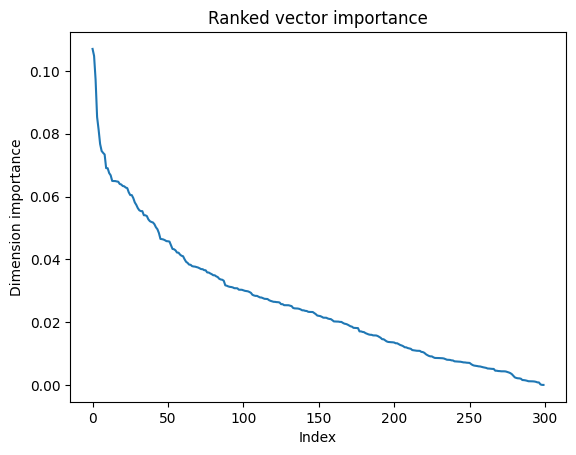

In [13]:
ugly_vecs = np.array([model.get_word_vector(w) for w in cute_words])
beauty_vecs = np.array([model.get_word_vector(w) for w in horrific_words])

ugly_mean = np.mean( np.array(ugly_vecs), axis=0 )
beauty_mean = np.mean( np.array(beauty_vecs), axis=0 )

dif_vec = ugly_mean - beauty_mean
dif_vec = np.abs(dif_vec)
sort_vec = np.sort(dif_vec)[::-1]
print(sort_vec[:100])

import matplotlib.pyplot as plt

# Plot
plt.plot(sort_vec)
plt.xlabel("Index")
plt.ylabel("Dimension importance")
plt.title("Ranked vector importance")
plt.show()


In [14]:
from nltk.corpus import wordnet as wn

def get_synonyms_and_antonyms(word):
    synonyms = set()
    antonyms = set()

    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())

            if lemma.antonyms():
                antonyms.add(lemma.antonyms()[0].name())

    return list(synonyms), list(antonyms)


syns, ants = get_synonyms_and_antonyms("beautiful")

print("Synonyms:", syns)
print("Antonyms:", ants)

Synonyms: ['beautiful']
Antonyms: ['ugly']
